# Predict time taken by delivery person

1. Problem Statement and Data Description<br>
2. Read Data as dataframe<br>
3. EDA<br>
	3.a) Basic EDA<br>
	3.b) Analysis of numerical and categorical attributes<br>
4. Handling Missing Value<br>
5. Relationship with Target variable<br>
6. Feature Engineering<br>
7. Encoding the Categorical variables<br>
8. Scaling<br>
9. Target Variable check<br>
10. Model Building and tuning<br>
11. Final Submission<br>
12. Future Work


Challenge link: https://assessment.hackerearth.com/challenges/new/hiring/amazon-business-research-analyst-hiring-challenge/?recommendations=1#job

## 1. Problem Statement and Data Description<br>

__Problem Statement:__ You are working as a data scientist at a food delivery company. The company wants to improve its system that calculate ETA for delivery persons. Rather than relying on some fixed method/formula, The management has decided to develop intelligent software that can predict the time of arrival for the delivery persons.

__Task:__ Develop a machine learning model that can calculate the time taken be the delivery person to deliver the order, given relevant information.

__Data Description:__ <br>

__ID:__ Unique identifier of an entry<br>
__Delivery_person_ID:__ Unique identifier of a delivery person<br>
__Delivery_person_Age:__ Represents the age of a person<br>
__Delivery_person_Ratings:__ Represents average ratings given to the delivery person<br>
__Restaurant_latitude:__ Represents latitude of the Restaurant<br>
__Restaurant_longitude:__ Represents longitude of the Restaurant<br>
__Delivery_location_latitude:__ Represents latitude of the Delivery location<br>
__Delivery_location_longitude:__ Represents longitude of the Delivery location<br>
__Order_Date:__ Represents the date when the order was placed<br>
__Time_Orderd:__ Represents the time when the order was placed<br>
__Time_Order_picked:__ Represents the time when the order was picked from the restaurant<br>
__Weather conditions:__ Represents weather condition(Windy, Sunny, Cloudy etc)<br>
__Road_traffic_density:__ Represents the road traffic density(Jam, High, Low etc)<br>
__Vehicle_condition:__ Represents condition of the vehicle(smooth, good or average)<br>
__Type_of_order:__ Represents order type(snack, drinks etc)<br>
__Type_of_vehicle:__ Represents vehicle type(motorbike, bicycle etc)<br>
__multiple_deliveries:__ Represents the number of orders to be delivered in one attempt<br>
__Festival:__ Represents whether day is festive or not<br>
__City:__ Represents the city<br>
__Time_taken (min):__ Represents the time taken by the delivery person to deliver the order<br>

In [1]:
#import module
import re
import numpy as np
import pandas as pd
import pandas_profiling as pp
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import scipy.stats as st
import geopy.distance
from sklearn.impute import KNNImputer
from sklearn.feature_selection import chi2
from feature_engine.selection import DropDuplicateFeatures, DropConstantFeatures, DropCorrelatedFeatures, RecursiveFeatureElimination
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

# 2. Read Data as dataframe

In [2]:
#Read the train and test data frame
train_df = pd.read_csv('traindata.csv')
test_df = pd.read_csv('testdata.csv')

# 3. EDA

## 3.a) Basic EDA

In [3]:
#row vs column
print('Train Data: ',train_df.shape)
print('Test Data: ',test_df.shape)

Train Data:  (45593, 21)
Test Data:  (11399, 20)


In [4]:
#lets check how data looks like
train_df.head()

,Unnamed: 0,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,...,Time_Order_picked,Weather conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,...,11:45,Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24.0
1,1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,...,19:50,Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,33.0
2,2,0x5d6d,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,...,8:45,Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,26.0
3,3,0x7a6a,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,...,18:10,Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21.0
4,4,0x70a2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,...,13:45,Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,30.0


In [5]:
#lets check the data types of the columns
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   45593 non-null  int64  
 1   ID                           45593 non-null  object 
 2   Delivery_person_ID           45593 non-null  object 
 3   Delivery_person_Age          43739 non-null  float64
 4   Delivery_person_Ratings      43685 non-null  float64
 5   Restaurant_latitude          45593 non-null  float64
 6   Restaurant_longitude         45593 non-null  float64
 7   Delivery_location_latitude   45593 non-null  float64
 8   Delivery_location_longitude  45593 non-null  float64
 9   Order_Date                   45593 non-null  object 
 10  Time_Orderd                  43862 non-null  object 
 11  Time_Order_picked            45593 non-null  object 
 12  Weather conditions           44977 non-null  object 
 13  Road_traffic_den

In [6]:
#describe numerical column
train_df.describe()

,Unnamed: 0,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min)
count,45593.000000,43739.000000,43685.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,44600.000000,45593.000000
mean,22796.000000,29.567137,4.633780,17.017729,70.231332,17.465186,70.845702,1.023359,0.744664,26.294607
std,13161.709748,5.815155,0.334716,8.185109,22.883647,7.335122,21.118812,0.839065,0.572473,9.383806
min,0.000000,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,0.000000,0.000000,10.000000
25%,11398.000000,25.000000,4.500000,12.933284,73.170000,12.988453,73.280000,0.000000,0.000000,19.000000
50%,22796.000000,30.000000,4.700000,18.546947,75.898497,18.633934,76.002574,1.000000,1.000000,26.000000
75%,34194.000000,35.000000,4.900000,22.728163,78.044095,22.785049,78.107044,2.000000,1.000000,32.000000
max,45592.000000,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,54.000000


In [7]:
#describe categorical column
train_df.describe(include = ['O'])

,ID,Delivery_person_ID,Order_Date,Time_Orderd,Time_Order_picked,Weather conditions,Road_traffic_density,Type_of_order,Type_of_vehicle,Festival,City
count,45593,45593,45593,43862,45593,44977,44992,45593,45593,45365,44393
unique,45593,1320,44,176,193,6,4,4,4,2,3
top,0x4607,PUNERES01DEL01,15-03-2022,21:55,21:30,Fog,Low,Snack,motorcycle,No,Metropolitian
freq,1,67,1192,461,496,7654,15477,11533,26435,44469,34093


In [8]:
# Check unique value for each attribute
train_df.nunique()

Unnamed: 0                     45593
ID                             45593
Delivery_person_ID              1320
Delivery_person_Age               22
Delivery_person_Ratings           28
Restaurant_latitude              657
Restaurant_longitude             518
Delivery_location_latitude      4373
Delivery_location_longitude     4373
Order_Date                        44
Time_Orderd                      176
Time_Order_picked                193
Weather conditions                 6
Road_traffic_density               4
Vehicle_condition                  4
Type_of_order                      4
Type_of_vehicle                    4
multiple_deliveries                4
Festival                           2
City                               3
Time_taken (min)                  45
dtype: int64

In [9]:
# As 'ID' and 'Unnamed: 0'  columns are unique for each row and unnecessary we can remove those attributes
train_df = train_df.drop(columns = ['Unnamed: 0','ID'], axis=1)
ID = test_df['ID'].tolist() ## will requir for final submission
test_df = test_df.drop(columns = ['Unnamed: 0','ID'], axis=1)

In [10]:
#Possibly there are variables that are numerical but represents categorical values or vice versa. Lets check.
train_df.select_dtypes(np.number)

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min)
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2,0.0,24.0
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2,1.0,33.0
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,0,1.0,26.0
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,0,1.0,21.0
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,1,1.0,30.0
...,...,...,...,...,...,...,...,...,...
45588,30.0,4.8,26.902328,75.794257,26.912328,75.804257,1,0.0,32.0
45589,21.0,4.6,0.000000,0.000000,0.070000,0.070000,0,1.0,36.0
45590,30.0,4.9,13.022394,80.242439,13.052394,80.272439,1,0.0,16.0
45591,20.0,4.7,11.001753,76.986241,11.041753,77.026241,0,1.0,26.0


__Observation:__<br>
Vehicle_condition it seems categorical.<br>
Time_Orderd and Time_Order_picked should be numerical. Lets standardize the time related columns then. will convert them into hour<br>
Also for multiple_deliveries what does it mean by 0. It is the number of orders to be delivered in one attempt.

In [11]:
#convert Vehicle_condition to categorical
train_df['Vehicle_condition'] = train_df['Vehicle_condition'].astype(str)
test_df['Vehicle_condition'] = test_df['Vehicle_condition'].astype(str)

In [12]:
#convert time related columns into hour
def time_norm(x):
    x= str(x).split(':')
    if len(x)==2:
        return(int(x[0])+int(x[1])/60)

In [13]:
train_df['Time_Orderd'] = train_df['Time_Orderd'].apply(lambda x: time_norm(x))
test_df['Time_Orderd'] = test_df['Time_Orderd'].apply(lambda x: time_norm(x))

In [14]:
train_df['Time_Order_picked'] = train_df['Time_Order_picked'].apply(lambda x: time_norm(x))
test_df['Time_Order_picked'] = test_df['Time_Order_picked'].apply(lambda x: time_norm(x))

In [15]:
train_df.corr()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,multiple_deliveries,Time_taken (min)
Delivery_person_Age,1.000000,-0.067939,-0.004532,-0.009347,0.002489,-0.000495,0.002892,0.002073,0.115851,0.299474
Delivery_person_Ratings,-0.067939,1.000000,-0.007792,-0.014203,-0.010318,-0.013552,-0.062268,-0.059903,-0.117647,-0.338790
Restaurant_latitude,-0.004532,-0.007792,1.000000,0.661784,0.866378,0.602713,0.006534,0.004963,0.008051,0.013981
Restaurant_longitude,-0.009347,-0.014203,0.661784,1.000000,0.632293,0.915026,-0.001915,-0.003137,0.004461,0.007821
Delivery_location_latitude,0.002489,-0.010318,0.866378,0.632293,1.000000,0.690515,0.010082,0.010226,0.010277,0.014243
Delivery_location_longitude,-0.000495,-0.013552,0.602713,0.915026,0.690515,1.000000,-0.000822,-0.000296,0.005023,0.007625
Time_Orderd,0.002892,-0.062268,0.006534,-0.001915,0.010082,-0.000822,1.000000,0.999887,0.065321,0.173267
Time_Order_picked,0.002073,-0.059903,0.004963,-0.003137,0.010226,-0.000296,0.999887,1.000000,0.065410,0.173253
multiple_deliveries,0.115851,-0.117647,0.008051,0.004461,0.010277,0.005023,0.065321,0.065410,1.000000,0.387051
Time_taken (min),0.299474,-0.338790,0.013981,0.007821,0.014243,0.007625,0.173267,0.173253,0.387051,1.000000


## 3.b) Analysis of numerical and categorical attributes

Lets analyze Numerical and Categorical variables separately. For this we divide the entire set into two parts. quantitative and qualitative

In [16]:
quantitative = []
qualitative = []
for i in train_df.columns:
    if train_df.dtypes[i] != 'object':
        quantitative.append(i)
    else:
        qualitative.append(i)

In [17]:
print('Numerical :: ',quantitative)
print('\nCatagorical :: ',qualitative)

Numerical ::  ['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude', 'Time_Orderd', 'Time_Order_picked', 'multiple_deliveries', 'Time_taken (min)']

Catagorical ::  ['Delivery_person_ID', 'Order_Date', 'Weather conditions', 'Road_traffic_density', 'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle', 'Festival', 'City']


In [18]:
qualitative.remove('Delivery_person_ID')
qualitative.remove('Order_Date')

In [19]:
#sns.pairplot(train_df)

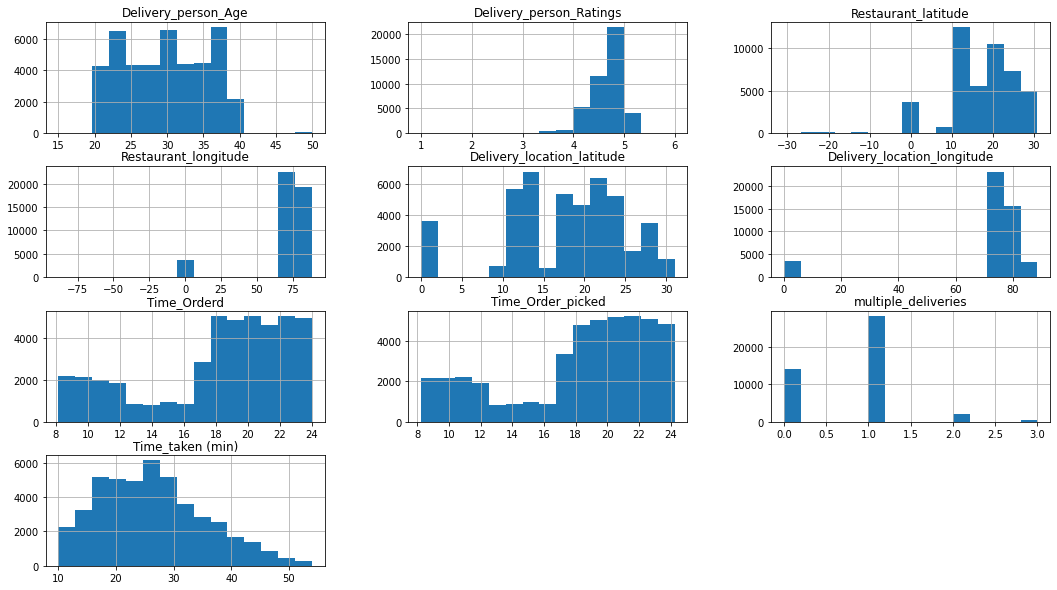

In [20]:
#Analyzing nuumerical variable
train_df[quantitative].hist(bins=15, figsize=(18, 10));

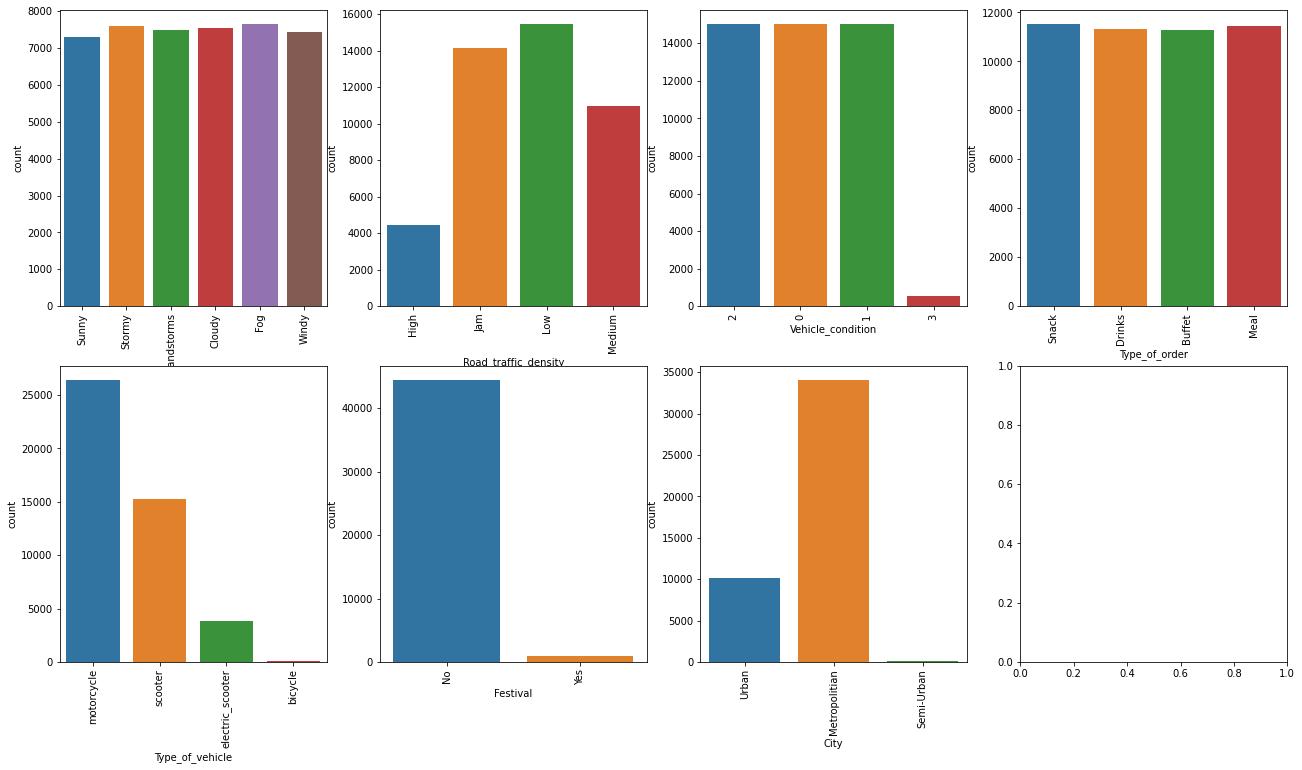

In [21]:
#Analyzing categorical variable
fig, ax = plt.subplots(2, 4, figsize=(22, 12))
for variable, subplot in zip(qualitative, ax.flatten()):
    sns.countplot(train_df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [22]:
#Pandas profiling
profile = pp.ProfileReport(train_df)
profile.to_file("EDA_profile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## 4. Handling Missing Value

In [23]:
#Check for missing value
train_df.isnull().sum()

Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [24]:
#Check missing data percentage
missing = (train_df.isnull().sum() / train_df.shape[0] * 100).sort_values(ascending=False)
missing = missing[missing > 0]
missing

Delivery_person_Ratings    4.184853
Delivery_person_Age        4.066414
Time_Orderd                3.796635
City                       2.631983
multiple_deliveries        2.177966
Weather conditions         1.351085
Road_traffic_density       1.318185
Festival                   0.500077
dtype: float64

#### 4.a) Impute Missing value for numerical data<br>
Time_Orderd    --->                1731<br>
Delay            --->              1731<br>
Delivery_person_Age      --->      1854<br>
Delivery_person_Ratings    --->    1908<br>
Time_Orderd         --->           1731<br>

Time_Orderd: Its a time variable we can't simply put the missing value by mean/median/mode. But we have another attribute as Time_Order_picked. From this variable can we try to relate Time_Orderd. We can calculate the average delay from order time and picked time then based on the average delay we impute the missing value.<br> 
__average_delay__ come from feature engineering section

In [25]:
train_df['Delay'] = train_df['Time_Order_picked'] - train_df['Time_Orderd']
test_df['Delay'] = test_df['Time_Order_picked'] - test_df['Time_Orderd']

In [26]:
average_delay = train_df['Delay'].mean()
print('average_delay:: ',average_delay)

average_delay::  0.16648997613727898


In [27]:
train_df['Time_Orderd'] = train_df['Time_Orderd'].fillna(train_df['Time_Order_picked'] - average_delay)
test_df['Time_Orderd'] = test_df['Time_Orderd'].fillna(test_df['Time_Order_picked'] - average_delay)

<AxesSubplot:xlabel='Delivery_person_Age', ylabel='count'>

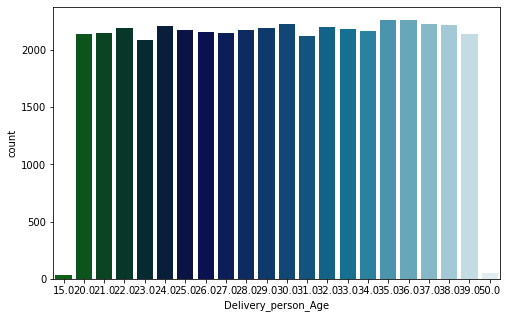

In [28]:
#Delivery_person_Age
plt.figure(figsize=(8,5))
sns.countplot('Delivery_person_Age',data=train_df,palette='ocean')

<AxesSubplot:xlabel='Delivery_person_Ratings', ylabel='count'>

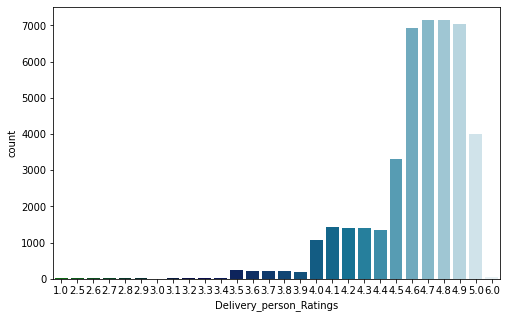

In [29]:
#Delivery_person_Ratings
plt.figure(figsize=(8,5))
sns.countplot('Delivery_person_Ratings',data=train_df,palette='ocean')

<AxesSubplot:xlabel='multiple_deliveries', ylabel='count'>

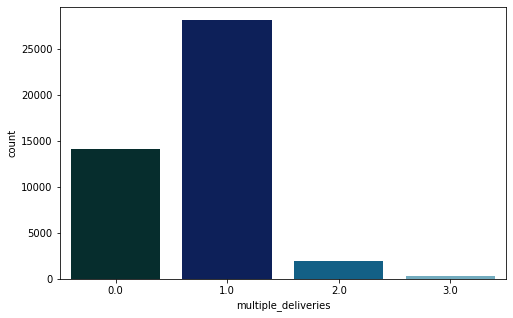

In [30]:
#Delivery_person_Ratings
plt.figure(figsize=(8,5))
sns.countplot('multiple_deliveries',data=train_df,palette='ocean')

__Observations__:<br>
If Delivery_person_Age is Missed then Delivery_person_Ratings is also missed<br>
For multiple_deliveries we can impute by median as less missing data<br>
for other two(Delivery_person_Age, Delivery_person_Ratings) let us try knn imputer

In [31]:
train_df['multiple_deliveries'] = train_df['multiple_deliveries'].fillna(train_df['multiple_deliveries'].median())
test_df['multiple_deliveries'] = test_df['multiple_deliveries'].fillna(test_df['multiple_deliveries'].median())

In [32]:
train_df_numeric = train_df.select_dtypes(np.number)

In [33]:
#impute for traindata
imputer = KNNImputer(n_neighbors=5)
train_df_numeric = pd.DataFrame(imputer.fit_transform(train_df_numeric), columns=train_df_numeric.columns)

In [34]:
for i in train_df_numeric.columns:
    train_df[i] = train_df_numeric[i]

In [35]:
#impute for testdata
test_df_numeric = test_df.select_dtypes(np.number)
imputer = KNNImputer(n_neighbors=5)
test_df_numeric = pd.DataFrame(imputer.fit_transform(test_df_numeric), columns=test_df_numeric.columns)

for i in test_df_numeric.columns:
    test_df[i] = test_df_numeric[i]

#### 4.b) Impute Missing value for categorical data:<br>
Weather conditions    --->         158<br>
Road_traffic_density    --->       154<br>
Festival          --->              65<br>
City              --->             324<br>

<AxesSubplot:xlabel='City', ylabel='count'>

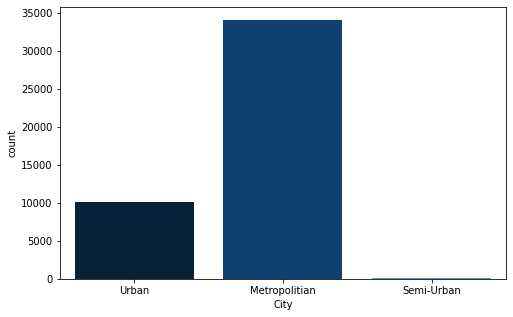

In [36]:
plt.figure(figsize=(8,5))
sns.countplot('City',data=train_df,palette='ocean')

<AxesSubplot:xlabel='Festival', ylabel='count'>

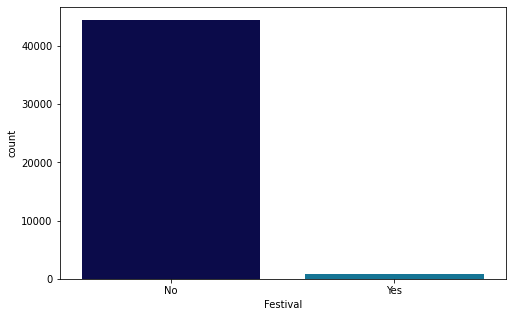

In [37]:
plt.figure(figsize=(8,5))
sns.countplot('Festival',data=train_df,palette='ocean')

<AxesSubplot:xlabel='Weather conditions', ylabel='count'>

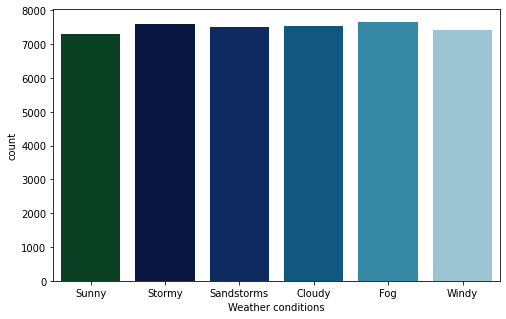

In [38]:
plt.figure(figsize=(8,5))
sns.countplot('Weather conditions',data=train_df,palette='ocean')

<AxesSubplot:xlabel='Road_traffic_density', ylabel='count'>

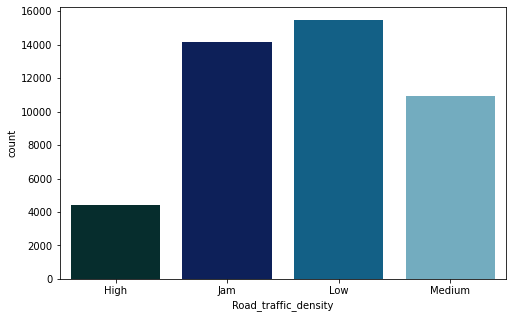

In [39]:
plt.figure(figsize=(8,5))
sns.countplot('Road_traffic_density',data=train_df,palette='ocean')

__Observations__:<br>

For City we can impute them by metropolitian(mode)<br>
For Festival we can impute them by No(mode)<br>
For Weather conditions it is difficult<br>
For Road_traffic_density also it is bit difficult<br>
Almost all cases where Weather conditions in NAN then Road_traffic_density is also NAN.<br>
As the count is very low for now we are imputing the missing value as mode for the column Road_traffic_density and Weather conditions. Otherwise we had to treat them as a separate value.

In [40]:
#traindata
for i in qualitative:
        train_df[i] = train_df[i].fillna(train_df[i].mode()[0])

In [41]:
#testdata
for i in qualitative:
        test_df[i] = test_df[i].fillna(test_df[i].mode()[0])

In [42]:
train_df.isnull().sum().sum()

0

No more missing value. good !! Lets try to visualize the relationship with target variable

## 5. Relationship with Target variable

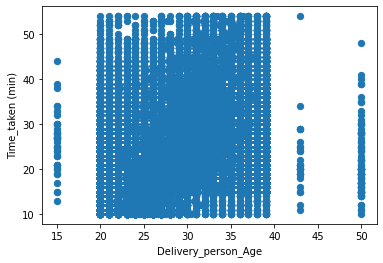

In [43]:
#Delivery_person_Age vs Time_taken (min)
train_df.plot.scatter(x = 'Delivery_person_Age', y = 'Time_taken (min)', s = 40);

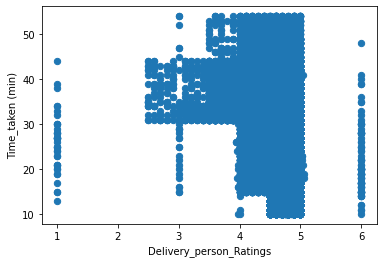

In [44]:
#Delivery_person_Ratings vs Time_taken (min)
train_df.plot.scatter(x = 'Delivery_person_Ratings', y = 'Time_taken (min)', s = 40);

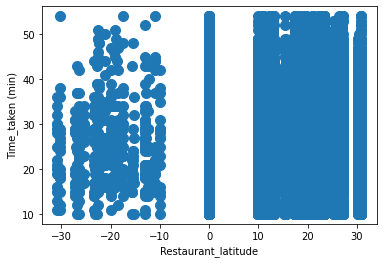

In [45]:
#Restaurant_latitude vs Time_taken (min)
train_df.plot.scatter(x = 'Restaurant_latitude', y = 'Time_taken (min)', s = 100);

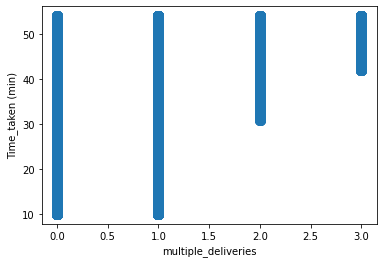

In [46]:
#multiple_deliveries vs Time_taken (min)
train_df.plot.scatter(x = 'multiple_deliveries', y = 'Time_taken (min)', s = 100);

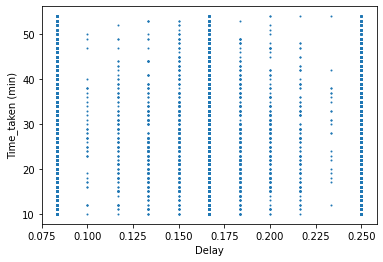

In [47]:
train_df.plot.scatter(x = 'Delay', y = 'Time_taken (min)', s = 1);

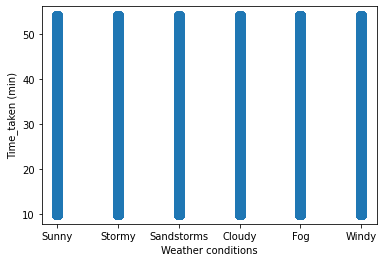

In [48]:
train_df.plot.scatter(x = 'Weather conditions', y = 'Time_taken (min)', s = 100);

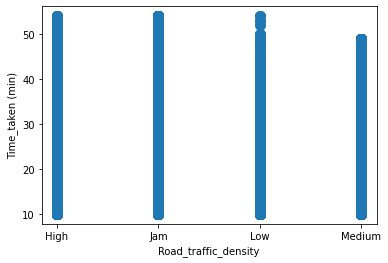

In [49]:
train_df.plot.scatter(x = 'Road_traffic_density', y = 'Time_taken (min)', s = 100);

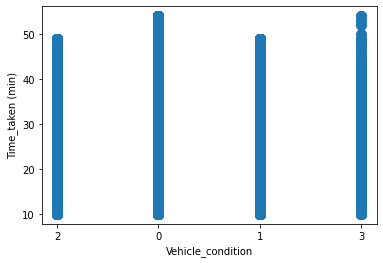

In [50]:
train_df.plot.scatter(x = 'Vehicle_condition', y = 'Time_taken (min)', s = 100);

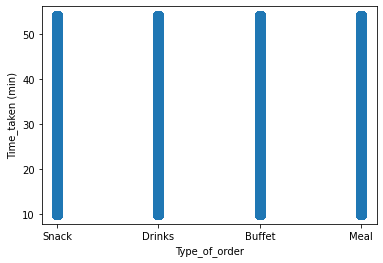

In [51]:
train_df.plot.scatter(x = 'Type_of_order', y = 'Time_taken (min)', s = 100);

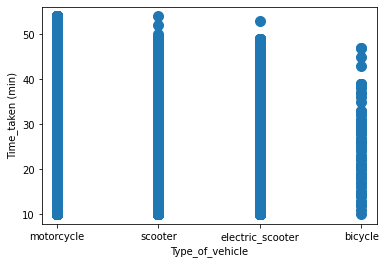

In [52]:
train_df.plot.scatter(x = 'Type_of_vehicle', y = 'Time_taken (min)', s = 100);

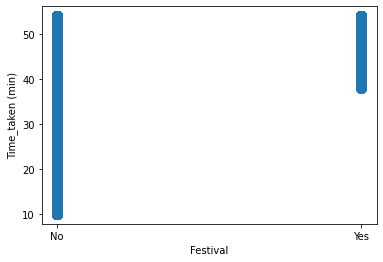

In [53]:
train_df.plot.scatter(x = 'Festival', y = 'Time_taken (min)', s = 100);

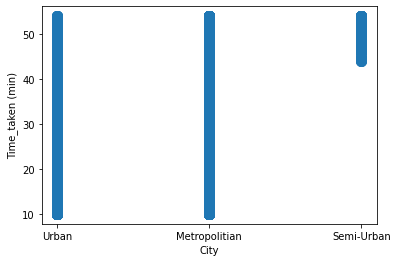

In [54]:
train_df.plot.scatter(x = 'City', y = 'Time_taken (min)', s = 100);

__Observation__:
Apart from below attributes we have not found any specific relationship with the target variable<br>
multiple_deliveries: If number of deliveries are high(2 or 3) then Time Taken is also high<br>
Festival : If there is any festival going on then Time Taken value is high<br>
City: For Semi-Urban City Time Taken value is high

In [55]:
train_df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,multiple_deliveries,Time_taken (min),Delay
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,29.598969,4.632848,17.017729,70.231332,17.465186,70.845702,18.149851,18.316341,0.750225,26.294607,0.166436
std,5.766534,0.335780,8.185109,22.883647,7.335122,21.118812,4.541241,4.542014,0.567430,9.383806,0.067079
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,8.083510,8.250000,0.000000,10.000000,0.083333
25%,25.000000,4.500000,12.933284,73.170000,12.988453,73.280000,15.833333,16.000000,0.000000,19.000000,0.083333
50%,30.000000,4.700000,18.546947,75.898497,18.633934,76.002574,19.333333,19.500000,1.000000,26.000000,0.166667
75%,34.200000,4.800000,22.728163,78.044095,22.785049,78.107044,21.666667,21.833333,1.000000,32.000000,0.250000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,24.083510,24.250000,3.000000,54.000000,0.250000


## 6. Feature Engineering

Let's see if we can create new features from the raw data to use in our machine learning model. We will remove feature if not relevant

__6.a) Delivery_person_ID__: We can guess the city for each ID. like guessing PUNE from PUNERES17DEL01 

In [56]:
train_df['Delivery_person_ID'].value_counts()

PUNERES01DEL01    67
JAPRES11DEL02     67
HYDRES04DEL02     66
JAPRES03DEL01     66
VADRES11DEL02     66
                  ..
DEHRES18DEL03      7
AURGRES11DEL03     7
KOLRES09DEL03      6
KOCRES16DEL03      6
BHPRES010DEL03     5
Name: Delivery_person_ID, Length: 1320, dtype: int64

In [57]:
train_df['Delivery_person_City'] = train_df['Delivery_person_ID'].apply(lambda x: re.sub('RES\d+.*', '', x))
test_df['Delivery_person_City'] = test_df['Delivery_person_ID'].apply(lambda x: re.sub('RES\d+.*', '', x))

In [58]:
train_df['Delivery_person_City'].value_counts()

JAP       3443
RANCHI    3229
BANG      3195
SUR       3187
HYD       3181
MUM       3173
MYS       3171
COIMB     3170
VAD       3166
INDO      3159
CHEN      3145
PUNE      3132
AGR        763
LUDH       758
ALH        740
KNP        740
DEH        737
GOA        709
AURG       703
KOC        701
KOL        700
BHP        691
Name: Delivery_person_City, dtype: int64

#### 6.b) From latitude and Longitude we can calculate the distance between Restaurant Location and Delivery Location

In [59]:
def cal_distance(Restaurant_latitude, Restaurant_longitude, Delivery_location_latitude, Delivery_location_longitude):
    coords_1 = (Restaurant_latitude, Restaurant_longitude)
    coords_2 = (Delivery_location_latitude, Delivery_location_longitude)
    return geopy.distance.geodesic(coords_1, coords_2).km

In [60]:
train_df['Distance'] = train_df.apply(lambda x: cal_distance(x.Restaurant_latitude, x.Restaurant_longitude, x.Delivery_location_latitude, x.Delivery_location_longitude), axis=1)
test_df['Distance'] = test_df.apply(lambda x: cal_distance(x.Restaurant_latitude, x.Restaurant_longitude, x.Delivery_location_latitude, x.Delivery_location_longitude), axis=1)

#### 6.c) Calculate the delay between time of order and order picked time

In [61]:
train_df['Delay'] = train_df['Time_Order_picked'] - train_df['Time_Orderd']

In [62]:
average_delay = train_df['Delay'].mean()
print('average_delay:: ',average_delay)

average_delay::  0.16648997613727895


#### 6.d) Age: we are going to group the delivery persons by their age

In [63]:
train_df['Delivery_person_Age'].value_counts()

36.0    2314
35.0    2280
30.0    2259
29.0    2251
32.0    2238
        ... 
22.2       2
22.4       2
21.8       2
37.4       1
37.6       1
Name: Delivery_person_Age, Length: 87, dtype: int64

In [64]:
train_df.Delivery_person_Age.unique()

array([37. , 34. , 23. , 38. , 32. , 22. , 33. , 35. , 36. , 21. , 24. ,
       29. , 25. , 31. , 27. , 26. , 20. , 33.2, 28. , 39. , 30. , 23.4,
       25.6, 30.4, 30.8, 30.2, 27.2, 43. , 35.2, 34.2, 26.4, 27.6, 50. ,
       21.8, 28.6, 29.8, 29.4, 34.6, 26.6, 25.4, 29.6, 28.4, 22.8, 27.4,
       27.8, 32.4, 26.8, 31.2, 30.6, 31.8, 32.6, 31.4, 22.6, 28.8, 29.2,
       23.6, 25.8, 32.2, 24.4, 24.8, 23.2, 15. , 24.2, 26.2, 34.8, 31.6,
       33.6, 24.6, 23.8, 28.2, 36.2, 35.6, 33.8, 25.2, 22.2, 32.8, 34.4,
       33.4, 37.2, 35.8, 35.4, 36.6, 36.8, 22.4, 36.4, 37.4, 37.6])

In [65]:
bins = [10,25,40,60]
labels = [lbl for lbl in range(len(bins)-1)]

In [66]:
train_df['Agecategory'] = pd.cut(train_df.Delivery_person_Age, bins = bins, labels = labels, right = True).astype(int)
test_df['Agecategory'] = pd.cut(test_df.Delivery_person_Age, bins = bins, labels = labels, right = True).astype(int)

In [67]:
train_df['Agecategory'].unique()

array([1, 0, 2])

#### 6.e) Work on datetime column

In [68]:
train_df.Order_Date = pd.to_datetime(train_df.Order_Date)

In [69]:
train_df['day'] = [i.day for i in train_df.Order_Date]
train_df['day_name'] = [i.day_name() for i in train_df.Order_Date]
train_df['day_of_year'] = [i.dayofyear for i in train_df.Order_Date]
train_df['week_of_year'] = [i.weekofyear for i in train_df.Order_Date]
train_df['month'] = [i.month for i in train_df.Order_Date]
train_df['hour'] = [i.hour for i in train_df.Order_Date]
train_df['is_weekday'] = [i.isoweekday() for i in train_df.Order_Date]

In [70]:
train_df.drop(['Order_Date'], axis = 1, inplace = True)

In [71]:
#do the same for testdata
test_df.Order_Date = pd.to_datetime(test_df.Order_Date)
test_df['day'] = [i.day for i in test_df.Order_Date]
test_df['day_name'] = [i.day_name() for i in test_df.Order_Date]
test_df['day_of_year'] = [i.dayofyear for i in test_df.Order_Date]
test_df['week_of_year'] = [i.weekofyear for i in test_df.Order_Date]
test_df['month'] = [i.month for i in test_df.Order_Date]
test_df['hour'] = [i.hour for i in test_df.Order_Date]
test_df['is_weekday'] = [i.isoweekday() for i in test_df.Order_Date]
test_df.drop(['Order_Date'], axis = 1, inplace = True)

#### 6.f) Searching for Duplicated or Quasi-constant features

In [72]:
#Searching for Duplicated or Quasi-constant features
sel = DropConstantFeatures(tol=0.99, variables=None)

sel.fit(train_df)

features_to_drop = list(sel.features_to_drop_)
print(features_to_drop)

['hour']


#### 6.g) Looking for Correlated Features

In [73]:
#Looking for Correlated Features
sel = DropCorrelatedFeatures(threshold=0.80,    # more than 80% = remove
                             method='pearson') # you can use other methods like kendall or spearman

sel.fit(train_df)

features_to_drop = features_to_drop + list(sel.features_to_drop_)
features_to_drop = list(set(features_to_drop))
print('Features to drop', sel.features_to_drop_)
print()
print('Correlated Feature Sets', sel.correlated_feature_sets_)

Features to drop {'month', 'Time_Order_picked', 'Delivery_location_latitude', 'Delivery_location_longitude', 'week_of_year'}

Correlated Feature Sets [{'Restaurant_latitude', 'Delivery_location_latitude'}, {'Restaurant_longitude', 'Delivery_location_longitude'}, {'Time_Order_picked', 'Time_Orderd'}, {'week_of_year', 'month', 'day_of_year'}]


In [74]:
train_df.head(3)

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather conditions,...,Delivery_person_City,Distance,Agecategory,day,day_name,day_of_year,week_of_year,month,hour,is_weekday
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,11.50,11.750000,Sunny,...,INDO,3.020737,1,19,Saturday,78,11,3,0,6
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,19.75,19.833333,Stormy,...,BANG,20.143737,1,25,Friday,84,12,3,0,5
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,8.50,8.750000,Sandstorms,...,BANG,1.549693,0,19,Saturday,78,11,3,0,6


__Observation__:<br>
'Restaurant_latitude' and 'Delivery_location_latitude' are related<br>
'Restaurant_longitude' and 'Delivery_location_longitude' are related<br>
'Time_Orderd' and 'Time_Order_picked' are related<br>
'month', 'day_of_year' and 'week_of_year' are related 

In [75]:
train_df.drop(features_to_drop, axis=1, inplace=True)
test_df.drop(features_to_drop, axis=1, inplace=True)

In [76]:
train_df.shape

(45593, 23)

In [77]:
target = train_df['Time_taken (min)']

In [78]:
'''
from sklearn.ensemble import GradientBoostingRegressor
x = train_df.copy()
x.drop('Time_taken (min)', axis=1, inplace=True)
# build initial model using all the features
model = GradientBoostingRegressor(n_estimators=10, max_depth=4, random_state=10)

# Setup the RFE selector

sel = RecursiveFeatureElimination(
    variables=None, # automatically evaluate all numerical variables
    estimator = model, # the ML model
    scoring = 'r2', # the metric we want to evalute
    threshold = 0.001, # the maximum performance drop allowed to remove a feature
    cv=5, # cross-validation
)

# this may take quite a while, because
# we are building a lot of models with cross-validation
x = x.iloc[0:45593]
sel.fit(x, target)

# performance of model trained using all features

sel.initial_model_performance_

# importance of all features based of initial model
sel.feature_importances_.plot.bar(figsize=(20,6))
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()
'''

"\nfrom sklearn.ensemble import GradientBoostingRegressor\nx = train_df.copy()\nx.drop('Time_taken (min)', axis=1, inplace=True)\n# build initial model using all the features\nmodel = GradientBoostingRegressor(n_estimators=10, max_depth=4, random_state=10)\n\n# Setup the RFE selector\n\nsel = RecursiveFeatureElimination(\n    variables=None, # automatically evaluate all numerical variables\n    estimator = model, # the ML model\n    scoring = 'r2', # the metric we want to evalute\n    threshold = 0.001, # the maximum performance drop allowed to remove a feature\n    cv=5, # cross-validation\n)\n\n# this may take quite a while, because\n# we are building a lot of models with cross-validation\nx = x.iloc[0:45593]\nsel.fit(x, target)\n\n# performance of model trained using all features\n\nsel.initial_model_performance_\n\n# importance of all features based of initial model\nsel.feature_importances_.plot.bar(figsize=(20,6))\nplt.xlabel('Features')\nplt.ylabel('Importance')\nplt.show()\n"

In [79]:
'''
# Resultant Dataframe will be a dataframe where the column names and Index will be the same
# This is a matrix similar to correlation matrix which we get after df.corr()
# Initialize the values in this matrix with 0
df = train_df
resultant = pd.DataFrame(data=[(0 for i in range(len(df.columns))) for i in range(len(df.columns))], 
                         columns=list(df.columns))
resultant.set_index(pd.Index(list(df.columns)), inplace = True)

# Finding p_value for all columns and putting them in the resultant matrix
for i in list(df.columns):
    for j in list(df.columns):
        if i != j:
            chi2_val, p_val = chi2(np.array(df[i]).reshape(-1, 1), np.array(df[j]).reshape(-1, 1))
            resultant.loc[i,j] = p_val
print(resultant)
'''

'\n# Resultant Dataframe will be a dataframe where the column names and Index will be the same\n# This is a matrix similar to correlation matrix which we get after df.corr()\n# Initialize the values in this matrix with 0\ndf = train_df\nresultant = pd.DataFrame(data=[(0 for i in range(len(df.columns))) for i in range(len(df.columns))], \n                         columns=list(df.columns))\nresultant.set_index(pd.Index(list(df.columns)), inplace = True)\n\n# Finding p_value for all columns and putting them in the resultant matrix\nfor i in list(df.columns):\n    for j in list(df.columns):\n        if i != j:\n            chi2_val, p_val = chi2(np.array(df[i]).reshape(-1, 1), np.array(df[j]).reshape(-1, 1))\n            resultant.loc[i,j] = p_val\nprint(resultant)\n'

In [80]:
'''
# Plotting a heatmap
fig = plt.figure(figsize=(6,6))
sns.heatmap(resultant, annot=True, cmap='Blues')
plt.title('Chi-Square Test Results')
plt.show()
'''

"\n# Plotting a heatmap\nfig = plt.figure(figsize=(6,6))\nsns.heatmap(resultant, annot=True, cmap='Blues')\nplt.title('Chi-Square Test Results')\nplt.show()\n"

## 7. Encoding the Categorical variables

In [81]:
# Labelencoding - Convert Categorical to dummy numbers -- Train Data
le = LabelEncoder()
var_mod = train_df.select_dtypes(include='object').columns
for i in var_mod:
    train_df[i] = pd.Series(le.fit_transform(train_df[i]))

In [82]:
# Labelencoding - Convert Categorical to dummy numbers  -- Test Data
le = LabelEncoder()
var_mod = test_df.select_dtypes(include='object').columns
for i in var_mod:
    test_df[i] = pd.Series(le.fit_transform(test_df[i]))

## 8. Scaling

In [83]:
#Scale the features using StandardScaler -- Training Data
scaler = StandardScaler()
train_df = pd.DataFrame(scaler.fit_transform(train_df), index=train_df.index, columns=train_df.columns)

In [84]:
#Scale the features using StandardScaler -- Test Data
scaler = StandardScaler()
test_df = pd.DataFrame(scaler.fit_transform(test_df), index=test_df.index, columns=test_df.columns)

In [85]:
'''
scaler = StandardScaler()
#train_df = pd.DataFrame(scaler.fit_transform(train_df), index=train_df.index, columns=train_df.columns)
train_df[["Delivery_person_ID"]] = scaler.fit_transform(train_df[["Delivery_person_ID"]])
train_df[["Delivery_person_Age"]] = scaler.fit_transform(train_df[["Delivery_person_Age"]])
train_df[["Restaurant_latitude"]] = scaler.fit_transform(train_df[["Restaurant_latitude"]])
train_df[["Restaurant_longitude"]] = scaler.fit_transform(train_df[["Restaurant_longitude"]])
train_df[["Order_Date"]] = scaler.fit_transform(train_df[["Order_Date"]])
train_df[["Time_Orderd"]] = scaler.fit_transform(train_df[["Time_Orderd"]])
train_df[["Time_taken (min)"]] = scaler.fit_transform(train_df[["Time_taken (min)"]])
'''

'\nscaler = StandardScaler()\n#train_df = pd.DataFrame(scaler.fit_transform(train_df), index=train_df.index, columns=train_df.columns)\ntrain_df[["Delivery_person_ID"]] = scaler.fit_transform(train_df[["Delivery_person_ID"]])\ntrain_df[["Delivery_person_Age"]] = scaler.fit_transform(train_df[["Delivery_person_Age"]])\ntrain_df[["Restaurant_latitude"]] = scaler.fit_transform(train_df[["Restaurant_latitude"]])\ntrain_df[["Restaurant_longitude"]] = scaler.fit_transform(train_df[["Restaurant_longitude"]])\ntrain_df[["Order_Date"]] = scaler.fit_transform(train_df[["Order_Date"]])\ntrain_df[["Time_Orderd"]] = scaler.fit_transform(train_df[["Time_Orderd"]])\ntrain_df[["Time_taken (min)"]] = scaler.fit_transform(train_df[["Time_taken (min)"]])\n'

__Observation:__<br>
We have tried scaling of entire training set vs scaling of only those attributes where standard deviation is high.<br>
Scaling of entire training set gives little better accuracy.

## 9. Target Variable check

check distribution of the target variable

<AxesSubplot:ylabel='Density'>

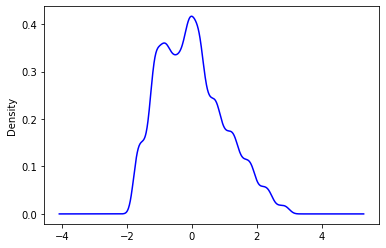

In [86]:
train_df['Time_taken (min)'].plot.density(color='blue')

<AxesSubplot:xlabel='Time_taken (min)', ylabel='Density'>

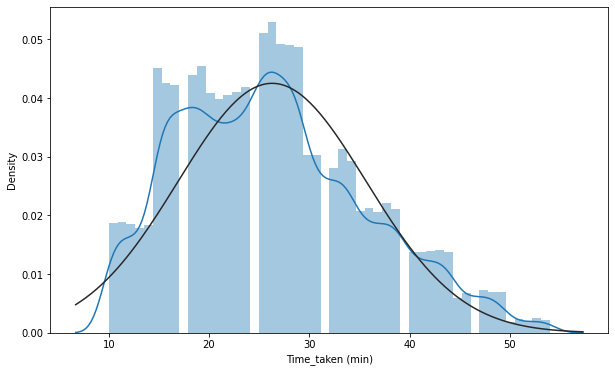

In [87]:
plt.figure(figsize=(10,6))
sns.distplot(target, fit=st.norm)


In [88]:
#plt.figure(figsize=(10,6))
#sns.distplot(target, fit=st.johnsonsu)

__Observation__<br>
Target variable is looks normal. But bit right skewed. Lets check the skewness value

In [89]:
print(target.skew())

0.4859512298743323


Thumb rule for skewness: A skewness value greater than 1 or less than -1 indicates a highly skewed distribution.<br> A value between 0.5 and 1 or -0.5 and -1 is moderately skewed. A value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical.

## 10. Model Building

In [90]:
#create validation set
X_train, X_test, y_train, y_test = train_test_split(train_df, target, train_size=0.75 ,test_size = 0.25, random_state=2)

In [91]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [92]:
# print the intercept
print(lm.intercept_)

26.29460662821047


In [93]:
coeff_df = pd.DataFrame(lm.coef_,train_df.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Delivery_person_ID,4.659775e-14
Delivery_person_Age,1.223327e-14
Delivery_person_Ratings,-5.734608e-15
Restaurant_latitude,-1.169611e-15
Restaurant_longitude,9.376161e-16
Time_Orderd,-3.194038e-16
Weather conditions,-3.445392e-15
Road_traffic_density,-3.732192e-15
Vehicle_condition,-2.715578e-15
Type_of_order,6.355911e-17


In [94]:
# Importing metrics from sklearn
from sklearn import metrics
predictions = lm.predict(X_test)
# Show the values of MAE, MSE, RMSE
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.4112679014805289e-14
MSE: 3.20456766904284e-28
RMSE: 1.7901306290443836e-14


__Observation:__<br>
With simple Linear Regression we are getting r2 score 44.05922 on final test data. Lets try other models. And this time we use entire training data and will check the cross validation score.

In [95]:
from sklearn.model_selection import cross_val_score, KFold

kfold = KFold(n_splits=10)

In [96]:
train_df.drop('Time_taken (min)', axis=1, inplace=True)

In [97]:
%%time
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_df, target)
cross_val_lasso = cross_val_score(lasso, train_df, target, scoring='neg_mean_squared_error', cv=kfold)
print(cross_val_lasso.mean(), cross_val_lasso.std())

-55.705472379743505 1.0660340892619422
CPU times: total: 672 ms
Wall time: 538 ms


In [98]:
%%time
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_df, target)
cross_val_ridge = cross_val_score(ridge, train_df, target, scoring='neg_mean_squared_error', cv=kfold)
print(cross_val_ridge.mean(), cross_val_ridge.std())

-48.35059300616113 0.7811503537066034
CPU times: total: 359 ms
Wall time: 352 ms


In [99]:
%%time
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(criterion='squared_error')
gbr.fit(train_df, target)
cross_val_gbr = cross_val_score(gbr, train_df, target, scoring='neg_mean_squared_error', cv=kfold)
print(cross_val_gbr.mean(), cross_val_gbr.std())

-19.36887676626663 0.36985853648935796
CPU times: total: 2min 30s
Wall time: 2min 30s


In [100]:
%%time
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state = 8)
rfr.fit(train_df, target)
cross_val_rfr = cross_val_score(rfr, train_df, target, scoring='neg_mean_squared_error', cv=kfold)
print(cross_val_rfr.mean(), cross_val_rfr.std())

-15.272947077893445 0.2629652371624497
CPU times: total: 10min 37s
Wall time: 10min 38s


As Random forest regressor is giving good result lets tune it more

__Hyperparameter Tuning__

In [101]:
%%time
# other scikit-learn modules
estimator = RandomForestRegressor(random_state = 8)

param_grid = {
    'max_features': [10,14,18,20,22,25],
    'n_estimators': [5, 8, 10,14,18,20,22,25],
    'max_depth':[2, 3, 4]
}

rfr_mod = GridSearchCV(estimator, param_grid, cv=3)
rfr_mod.fit(X_train, y_train)

print(f'Best parameters found by grid search are: {rfr_mod.best_params_}')

Best parameters found by grid search are: {'max_depth': 4, 'max_features': 22, 'n_estimators': 25}
CPU times: total: 3min 12s
Wall time: 3min 12s


In [102]:
%%time
# Now we will fit the same model with best parameters and on entire train data
rfr_final = RandomForestRegressor(max_depth = 4, max_features = 18, n_estimators = 10, random_state = 8)
rfr_final.fit(train_df, target)

CPU times: total: 953 ms
Wall time: 982 ms


RandomForestRegressor(max_depth=4, max_features=18, n_estimators=10,
                      random_state=8)

Note: Whatever parameters we have tuned(2 times) it has not improved the overall accuracy. This will be one of the future task in this project. So we will use the original Random Forest Regressor Model for final prediction.

# 11. Final Submission

Here we will use the model that has been trained on entire training data and choose the best model(Random Forest Regressor) while prediction.

In [103]:
test_df.head(3)

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Time_Orderd,Weather conditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,Festival,City,Delay,Delivery_person_City,Distance,Agecategory,day,day_name,day_of_year,is_weekday
0,-0.946004,-0.158952,0.263384,-0.744069,0.288828,-0.726515,0.838070,0.279498,2.344785,-0.436270,...,-0.134653,-0.53909,0.240051,-0.966946,-0.087137,0.629774,1.804687,1.488155,-0.249648,-0.456387
1,-1.411205,-0.264134,-0.072326,-0.503415,0.320453,0.508818,1.421755,-0.792507,-1.228505,1.354525,...,-0.134653,-0.53909,-1.253723,-1.448546,-0.077924,0.629774,1.700748,0.995088,-0.261458,-0.961863
2,-0.165227,-1.140651,-0.352085,1.197518,0.236683,0.305996,0.254386,-0.792507,-1.228505,-0.436270,...,-0.134653,-0.53909,-0.008911,-0.164279,-0.081033,-1.574337,-1.001654,-0.977180,1.958731,-1.467338


In [104]:
y_pred = rfr.predict(test_df)

In [105]:
y_pred

array([18.17, 29.63, 27.33, ..., 17.8 , 27.58, 24.3 ])

In [106]:
submission_df = pd.DataFrame()
submission_df['ID'] = ID
submission_df['Time_taken (min)'] = y_pred.tolist()
submission_df.to_csv('submission15.csv', index=False)

## 12. Future Work

1. More EDA. Use UMAP or TSNE to interpret data<br>
2. Look into non linear relationships between features. Currently we have checked the linear relationship only. <br>
3. Check for relationship between ordinal variables and numerical variables using spearman's rank test<br>
4. Check for relationship between two categorical variables using chi square test<br>
5. Look for polynomial features and use them precisely as a feature(we have found some in this notebook but when we tried to include that accuracy got dropped.)<br>
6. Hyperparameter tuning that we have not done properly.<br>
7. Use domain knowledge while feature engineering<br>


In [107]:
#End